In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def classification_metrics(target, pred):
    tn, fp, fn, tp = metrics.confusion_matrix(target, pred).ravel()
    acc = (tn + tp) / (tn + fp +fn + tp)
    sen = tp / (tp + fn)
    spc = tn / (tn + fp)
    prc = tp / (tp + fp)
    return acc, sen, spc, prc

In [3]:
data = load_breast_cancer()
X, y = data['data'], data['target']

In [4]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

In [5]:
n_repeat = 100
result_df = pd.DataFrame(columns=['acc', 'sen', 'spc', 'prc'])

for i in range(n_repeat):
    
    # Split train and test data
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)
    
    # Train the model
    model = SVC(kernel='rbf')
    model.fit(X_train, y_train)
    
    # Test the model
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    acc, sen, spc, prc = classification_metrics(y_test, y_pred)

    # Add to the dataframe
    result_df.loc[len(result_df)] = [acc, sen, spc, prc]

In [6]:
result_df

,acc,sen,spc,prc
0,1.000000,1.000000,1.000000,1.000000
1,0.991228,0.985075,1.000000,1.000000
2,0.964912,0.972973,0.950000,0.972973
3,0.947368,0.942029,0.955556,0.970149
4,0.973684,0.986111,0.952381,0.972603
...,...,...,...,...
95,0.973684,0.972222,0.976190,0.985915
96,0.973684,1.000000,0.923077,0.961538
97,0.982456,0.986842,0.973684,0.986842
98,0.991228,1.000000,0.972222,0.987342


In [7]:
result_df.mean()

acc    0.975877
sen    0.985105
spc    0.959551
prc    0.977259
dtype: float64

In [8]:
result_df.std()

acc    0.013849
sen    0.013024
spc    0.029929
prc    0.016371
dtype: float64

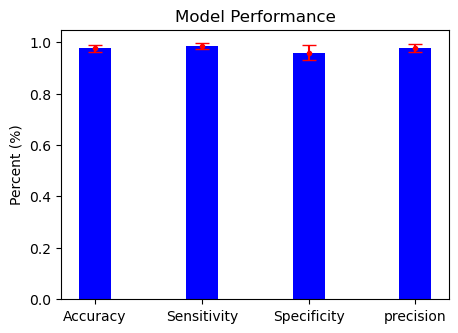

In [9]:
x = np.array(["Accuracy", "Sensitivity", "Specificity", "precision"])
y = np.array(result_df.mean())
s = np.array(result_df.std())

fig, ax = plt.subplots(figsize=(5, 3.5)) 
plt.bar(x, y, width = 0.3, color = 'b')
ax.errorbar(x, y, yerr=s, fmt='.', color='r', capsize=5)

plt.ylabel("Percent (%)")
plt.title("Model Performance")
plt.show()

In [17]:
model.intercept_, model.dual_coef_

(array([-0.2512134]),
 array([[-0.11707581, -1.        , -1.        , -1.        , -1.        ,
         -0.23041457, -0.78438096, -0.63775906, -0.53195776, -1.        ,
         -1.        , -0.38351092, -0.60098769, -0.57256518, -1.        ,
         -1.        , -0.3049794 , -0.3292612 , -1.        , -1.        ,
         -0.04571139, -1.        , -1.        , -0.30587755, -0.60757235,
         -0.08481339, -1.        , -1.        , -1.        , -1.        ,
         -0.24262918, -0.21288421, -0.2839569 , -0.74421302, -0.24616384,
         -0.02834915, -0.33048516, -1.        , -1.        , -1.        ,
         -0.18649221, -1.        , -1.        , -1.        , -1.        ,
         -0.7522128 , -0.44061407, -1.        , -0.2456271 , -0.24377064,
         -1.        , -1.        ,  1.        ,  0.77654809,  1.        ,
          1.        ,  1.        ,  1.        ,  0.69295435,  0.36752783,
          0.56546348,  0.51526536,  1.        ,  0.43875655,  0.97632029,
          0.4250

In [ ]:
model.coef_